In [1]:
# importing relevant libraries

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 20000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
trip_data=pd.read_csv('trip.csv', sep=',', header='infer')

In [4]:
trip_data.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [66]:
# Two distinct series for weekend and weekday

trip_data['start_date']=pd.to_datetime(trip_data['start_date'])

trip_data['day_week']=trip_data['start_date'].dt.weekday

trip_data['duration_minutes']= trip_data['duration']/60

trip_data_WD = trip_data[trip_data['day_week'].isin([0,1,2,3,4])]

trip_data_WE = trip_data[trip_data['day_week'].isin([5,6])]

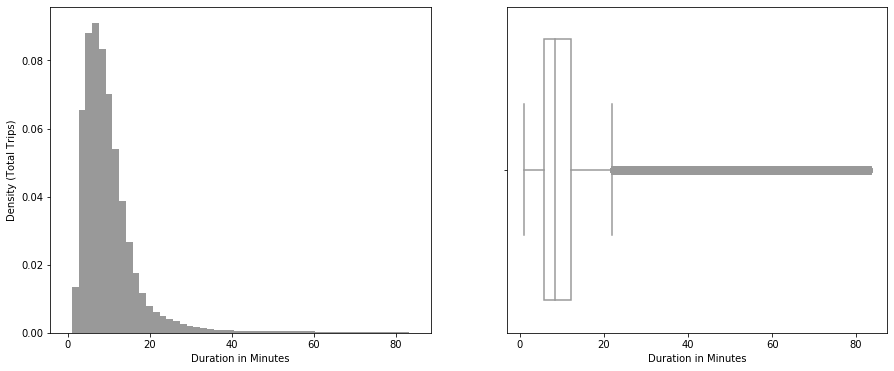

In [18]:
# DURATION OF TRIPS HISTOGRAMS

# transform second duration into minutes duration

trip_data['duration_minutes']= trip_data['duration']/60

trip_data_capped= trip_data[trip_data['duration']<5000]

#trip_data_capped = trip_data

fig, ax= plt.subplots(1,2,figsize=[15,6])

sns.distplot(trip_data_capped['duration_minutes'], kde=True, color=(0.0, 0.0, 0.0, 0.0),ax=ax[0])
ax[0].set_xlabel('Duration in Minutes')
ax[0].set_ylabel('Density (Total Trips)')
sns.boxplot(trip_data_capped['duration_minutes'], ax=ax[1], color='white')
ax[1].set_xlabel('Duration in Minutes')

#ax.set_yscale('log')
#ax.legend(['Logarithmic Scale'], loc='upper center')


#ax2=fig.add_axes([0.60,0.45,0.29,0.4])
#sns.distplot(trip_data_capped['duration_minutes'], kde=True, color='#FF6347')
#ax2.set_xlabel('Duration in Minutes')
#ax2.set_ylabel('Number of Trips')
#ax2.legend(['Linear Scale'], loc='upper center')

plt.savefig('Dist_duration.png')

plt.show()

In [19]:
# Equal stations data

# adding a cap and the subscription type , WD

trip_data_equal_WD= trip_data_WD[trip_data_WD['start_station_id']== trip_data_WD['end_station_id']].copy()

trip_data_equal_cappedCWD= trip_data_equal_WD[(trip_data_equal_WD['duration']<5000) & (trip_data_equal_WD['subscription_type']=='Customer')]

trip_data_equal_cappedSWD= trip_data_equal_WD[(trip_data_equal_WD['duration']<5000) & (trip_data_equal_WD['subscription_type']=='Subscriber')]

# adding a cap and the subscription type , WE

trip_data_equal_WE= trip_data_WE[trip_data_WE['start_station_id']==trip_data_WE['end_station_id']].copy()

trip_data_equal_cappedCWE= trip_data_equal_WE[(trip_data_equal_WE['duration']<5000) & (trip_data_equal_WE['subscription_type']=='Customer')]

trip_data_equal_cappedSWE= trip_data_equal_WE[(trip_data_equal_WE['duration']<5000) & (trip_data_equal_WE['subscription_type']=='Subscriber')]

In [20]:
trip_data_equal_cappedSWE.head(1)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,day_week,duration_minutes
1463,7250,68,2013-08-31 16:53:00,University and Emerson,35,8/31/2013 16:54,University and Emerson,35,100,Subscriber,97214,5,1.133333


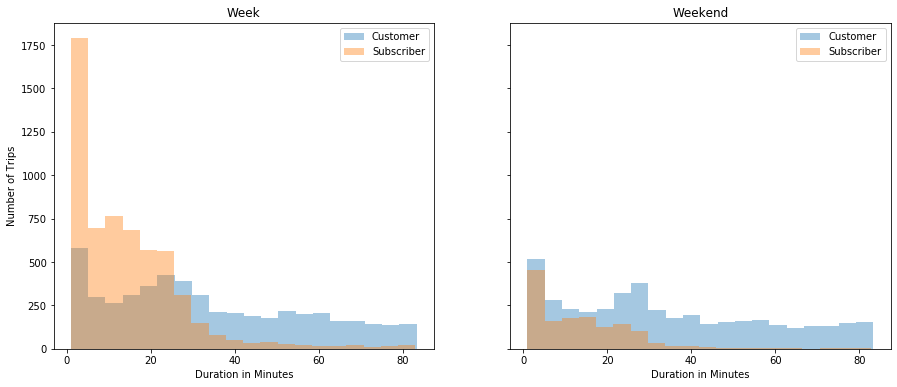

In [21]:
# Histogram of Duration of Trips of equal stations

def plotf(data1,data2,ax):

    g=sns.distplot(data1, kde=False, label='Customer', bins=20, ax=ax)
    g=sns.distplot(data2, kde=False, label='Subscriber',bins=20,  ax=ax)
    return g

fig, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=[15,6])
plotf(trip_data_equal_cappedCWD['duration_minutes'],trip_data_equal_cappedSWD['duration_minutes'],ax[0])
plotf(trip_data_equal_cappedCWE['duration_minutes'],trip_data_equal_cappedSWE['duration_minutes'], ax[1])
ax[0].set_ylabel('Number of Trips')
ax[0].set_xlabel('Duration in Minutes')
ax[0].legend()
ax[0].set_title('Week')
ax[1].legend()
ax[1].set_xlabel('Duration in Minutes')
ax[1].set_title('Weekend')
#ax[1].set_yscale('log')

plt.savefig('duration_equalst_log.png')

plt.show()

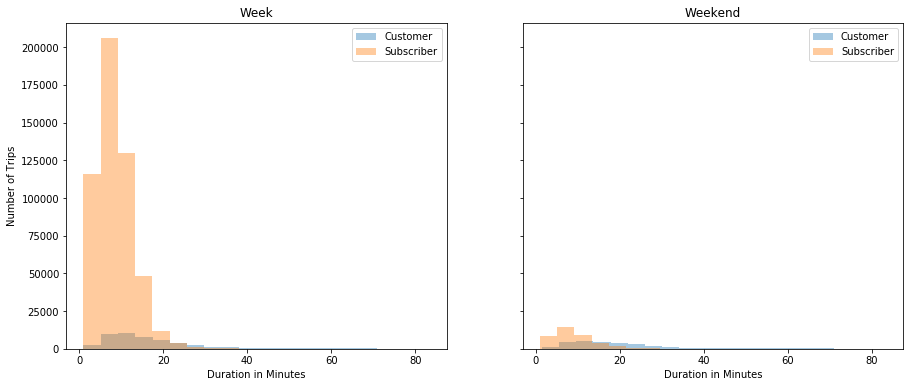

In [134]:
# Histogram of Duration of Trips between different stations

trip_data_nequal_WD= trip_data_WD[trip_data_WD['start_station_id']!= trip_data_WD['end_station_id']]

trip_data_nequal_cappedCWD= trip_data_nequal_WD[(trip_data_nequal_WD['duration']<5000) & (trip_data_nequal_WD['subscription_type']=='Customer')]

trip_data_nequal_cappedSWD= trip_data_nequal_WD[(trip_data_nequal_WD['duration']<5000) & (trip_data_nequal_WD['subscription_type']=='Subscriber')]

# adding a cap and the subscription type , WE

trip_data_nequal_WE= trip_data_WE[trip_data_WE['start_station_id']!=trip_data_WE['end_station_id']].copy()

trip_data_nequal_cappedCWE= trip_data_nequal_WE[(trip_data_nequal_WE['duration']<5000) & (trip_data_nequal_WE['subscription_type']=='Customer')]

trip_data_nequal_cappedSWE= trip_data_nequal_WE[(trip_data_nequal_WE['duration']<5000) & (trip_data_nequal_WE['subscription_type']=='Subscriber')]


fig, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=[15,6])
plotf(trip_data_nequal_cappedCWD['duration_minutes'],trip_data_nequal_cappedSWD['duration_minutes'],ax[0])
plotf(trip_data_nequal_cappedCWE['duration_minutes'],trip_data_nequal_cappedSWE['duration_minutes'], ax[1])
ax[0].set_ylabel('Number of Trips')
ax[0].set_xlabel('Duration in Minutes')
ax[0].legend()
ax[0].set_title('Week')
#ax[0].set_yscale('log')
ax[1].legend()
ax[1].set_title('Weekend')
ax[1].set_xlabel('Duration in Minutes')

plt.savefig('duration_nestat_log')

plt.show()

In [111]:
trip_data['subscription_type'].value_counts()

Subscriber    566746
Customer      103213
Name: subscription_type, dtype: int64

In [191]:
# equal stations weekday data

trip_data['duration_minutes']= trip_data['duration']/60

trip_data.head(1)


,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,day_week,duration_minutes,week,weekend,week_indicator
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,3,1.05,True,False,week


In [192]:
trip_data.iloc[0]['day_week']

3

In [193]:
week_indicator = []

for value in range(0,len(trip_data['duration_minutes'])):
    if trip_data.iloc[value]['day_week']<5:
        week_indicator.append('week')
    else:
        week_indicator.append('weekend')

In [194]:
trip_data['week_indicator'] = week_indicator

# cap data and select on condition equal stations : 

trip_data_equal_capped = trip_data[(trip_data['duration']<5000) & (trip_data['start_station_id']==trip_data['end_station_id'])]

In [196]:
trip_data_equal_capped.head(1)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,day_week,duration_minutes,week,weekend,week_indicator
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127,3,1.05,True,False,week


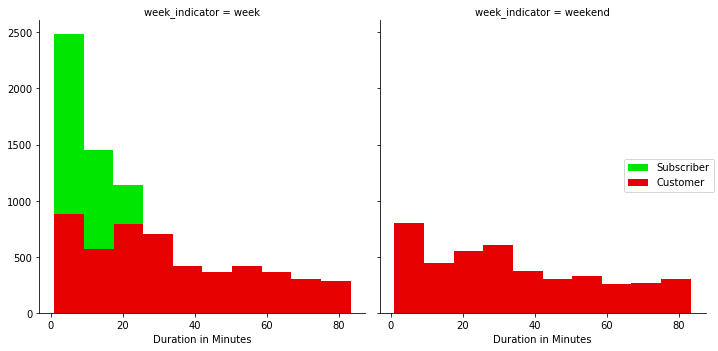

In [230]:
palette={'Customer':(0.9, 0.0, 0.0), 'Subscriber':(0.0, 0.9, 0.0)}

g = sns.FacetGrid(trip_data_equal_capped, col='week_indicator', hue='subscription_type', palette=palette, height=5)
g.map(plt.hist, 'duration_minutes')
g.set(xlabel='Duration in Minutes')
handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='center right', ncol=1)
#g.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=3)
#g.fig.legend(handles=handles, labels=labels, loc='upper left', ncol=3)
#g.fig.subplots_adjust(top=0.92, bottom=0.08)

plt.savefig('equal_stations_dis.png')


In [198]:
trip_data_equal_capped['week_indicator'].unique()

array(['week', 'weekend'], dtype=object)

In [199]:
## add distribution for cathegory subscriber over the weekend:

trip_data_equal_capped_SWD=trip_data_equal_capped[(trip_data_equal_capped['subscription_type']=='Subscriber') & (trip_data_equal_capped['week_indicator']=='weekend')]

In [167]:
# cap data and select on condition equal stations : 

trip_data_nequal_capped = trip_data[(trip_data['duration']<5000) & (trip_data['start_station_id']!=trip_data['end_station_id'])]

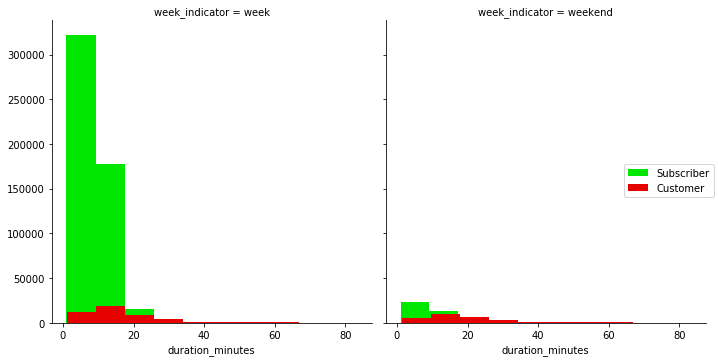

In [228]:
palette={'Customer':(0.9, 0.0, 0.0), 'Subscriber':(0.0, 0.9, 0.0)}


g = sns.FacetGrid(trip_data_nequal_capped, col='week_indicator', hue='subscription_type', palette=palette, height=5)
g.map(plt.hist, 'duration_minutes')
handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='center right', ncol=1)
#g.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=3)
#g.fig.legend(handles=handles, labels=labels, loc='upper left', ncol=3)
g.fig.subplots_adjust(top=0.92, bottom=0.08)
plt.savefig('not_equal_dis.png')

In [80]:
# Number of Trips per Month of the Year/ customer type
## SERIES FOR WEEKDAY

trip_data_month_WD=trip_data_WD[['start_date','subscription_type']].copy() 

trip_data_month_WD['start_date_month']=trip_data_month_WD['start_date'].dt.month

#trip_data_month_WD[trip_data_month_WD['start_date_month']==1]['start_date_month'].value_counts()

trip_month_grouped_WD = trip_data_month_WD.groupby(['subscription_type']).agg({'start_date_month': 'value_counts'})

trip_month_grouped_WD.rename(columns={'start_date_month':'Number of Trips'}, inplace=True)

trip_month_grouped_WD.reset_index(inplace=True)

## SERIES FOR WEEKEND

trip_data_month_WE=trip_data_WE[['start_date','subscription_type']].copy() 

trip_data_month_WE['start_date_month']=trip_data_month_WE['start_date'].dt.month

#trip_data_month_WE[trip_data_month_WE['start_date_month']==1]['start_date_month'].value_counts()

trip_month_grouped_WE = trip_data_month_WE.groupby(['subscription_type']).agg({'start_date_month': 'value_counts'})

trip_month_grouped_WE.rename(columns={'start_date_month':'Number of Trips'}, inplace=True)

trip_month_grouped_WE.reset_index(inplace=True)

NameError: name 'trip_month_grouped_WD' is not defined

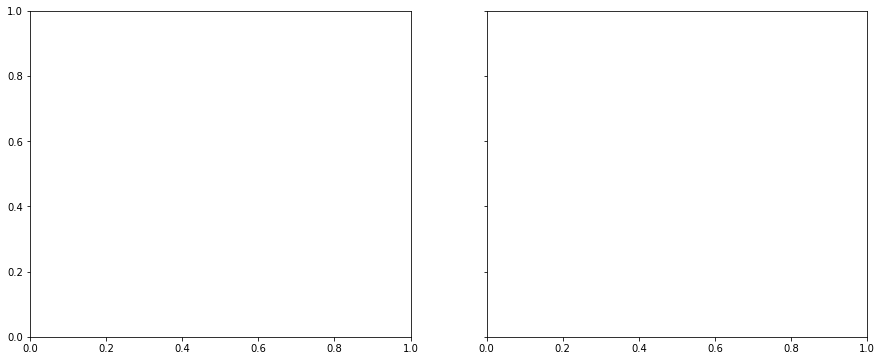

In [16]:
# Barplot for weekend and weekday

def plotb(x,y,data,ax):
    
    g=sns.barplot(x=x, y=y, hue='subscription_type', data=data,palette={'Customer':(0.9, 0.0, 0.0), 'Subscriber':(0.0, 0.9, 0.0)}, ax=ax)
    return g

fig, ax = plt.subplots(1,2,sharex=True, sharey=True, figsize=[15,6])
plotb(x='start_date_month', y='Number of Trips',data=trip_month_grouped_WD,ax=ax[0])
plotb(x='start_date_month', y='Number of Trips',data=trip_month_grouped_WE,ax=ax[1])
ax[0].set_xlabel((''))
ax[0].set_ylabel('Number of Trips')
ax[0].set_xticklabels(labels=['January','February','March','April','May','June','July','August','September','October',
'November','December'], rotation=45)
ax[0].set_title('Week')
ax[1].set_xlabel((''))
ax[1].set_ylabel((''))
ax[1].set_xticklabels(labels=['January','February','March','April','May','June','July','August','September','October',
'November','December'], rotation=45)
ax[1].set_title('Weekend')
plt.savefig('trips per month.png')
plt.show()

In [118]:
## HISTOGRAMS PER DAY OF THE WEEK

trip_data_day = trip_data[['start_date', 'subscription_type', 'day_week']].copy()

In [119]:
trip_data_day['day_week'].unique()

array([3, 4, 5, 6, 0, 1, 2])

In [120]:
trip_day_grouped = trip_data_day.groupby(['subscription_type']).agg({'day_week': 'value_counts'})

In [121]:
trip_data_day.head()

,start_date,subscription_type,day_week
0,2013-08-29 14:13:00,Subscriber,3
1,2013-08-29 14:42:00,Subscriber,3
2,2013-08-29 10:16:00,Subscriber,3
3,2013-08-29 11:29:00,Subscriber,3
4,2013-08-29 12:02:00,Subscriber,3


In [22]:
#trip_day_grouped # 0 is monday, 6 is sunday

In [122]:
trip_day_grouped.rename(columns={'day_week': 'Number of Trips'}, inplace=True)

In [123]:
trip_day_grouped.reset_index(inplace=True)

trip_day_grouped.head()

,subscription_type,day_week,Number of Trips
0,Customer,5,22125
1,Customer,6,19687
2,Customer,4,14946
3,Customer,3,12451
4,Customer,2,11495


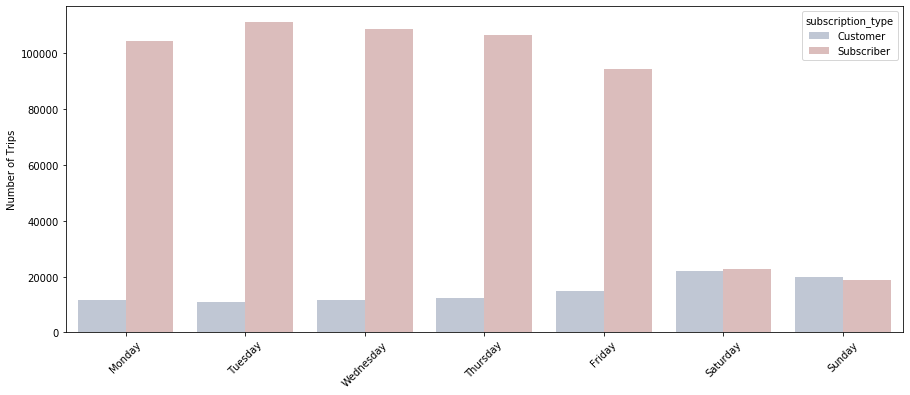

In [125]:
x=trip_day_grouped['day_week']
y=trip_day_grouped['Number of Trips']

fig= plt.figure(figsize=[15,6])
ax=sns.barplot(x=x, y=y, hue='subscription_type',palette='vlag', data=trip_day_grouped)
ax.set_xlabel((''))
ax.set_ylabel('Number of Trips')
ax.set_xticklabels(labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], rotation=45)
plt.savefig('trips_days.png')
plt.show()

In [104]:
# Number of Trips per Hour

## WEEKDAY SERIES

trip_data_hour_WD = trip_data_WD[['start_date', 'subscription_type']].copy()

trip_data_hour_WD['start_date']=trip_data_hour_WD['start_date'].dt.hour

#trip_data_hour_WD.head()

trip_data_hour_grouped_WD = trip_data_hour_WD.groupby(by=['start_date']).agg({'subscription_type':'value_counts'})

trip_data_hour_grouped_WD.rename(columns={'subscription_type':'Number of Trips'},inplace=True)

trip_data_hour_grouped_WD.reset_index(inplace=True)

#trip_data_hour_grouped_WD.head()

In [105]:
## WEEKEND SERIES

trip_data_hour_WE = trip_data_WE[['start_date', 'subscription_type']].copy()

trip_data_hour_WE['start_date']=trip_data_hour_WE['start_date'].dt.hour

#trip_data_hour_WD.head()

trip_data_hour_grouped_WE = trip_data_hour_WE.groupby(by=['start_date']).agg({'subscription_type':'value_counts'})

trip_data_hour_grouped_WE.rename(columns={'subscription_type':'Number of Trips'},inplace=True)

trip_data_hour_grouped_WE.reset_index(inplace=True)

# THREE TYPES OF GRAPHS FOR data with very different scales

#### WALTER 

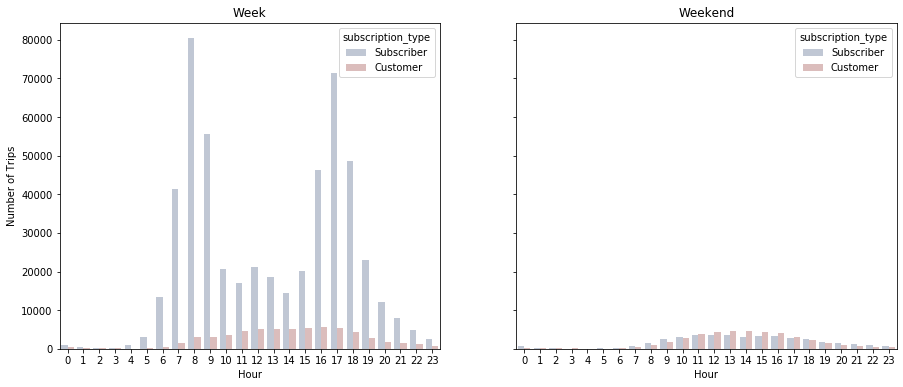

In [124]:
## share y axis and lineal scale

fig, ax = plt.subplots(1,2,sharex=True, sharey=True, figsize=[15,6])
plotb(x='start_date', y='Number of Trips',data=trip_data_hour_grouped_WD,ax=ax[0])
plotb(x='start_date', y='Number of Trips',data=trip_data_hour_grouped_WE,ax=ax[1])
ax[0].set_ylabel('Number of Trips')
ax[0].set_title('Week')
ax[0].set_xlabel('Hour')

ax[1].set_xlabel('Hour')
ax[1].set_title('Weekend')
ax[1].set_ylabel((''))
plt.savefig('trips per hour.png')

plt.show()

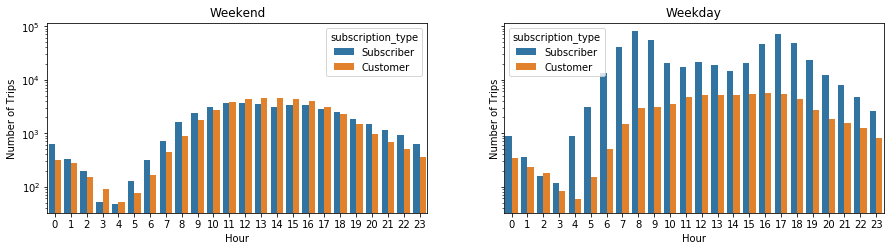

In [36]:
## share y axis and log scale

fig, ax = plt.subplots(1,2,sharex=True, sharey=True, figsize=[15,3.5])
plotb(x='start_date', y='Number of Trips',data=trip_data_hour_grouped_WE,ax=ax[0])
plotb(x='start_date', y='Number of Trips',data=trip_data_hour_grouped_WD,ax=ax[1])
ax[0].set_xlabel('Hour')
ax[0].set_ylabel('Number of Trips')
ax[0].set_title('Weekend')
ax[1].set_xlabel('Hour')
ax[1].set_title('Weekday')

plt.yscale('log')
plt.show()

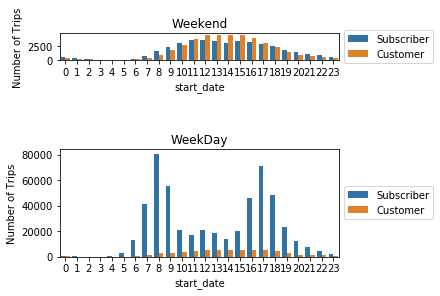

In [110]:
## Do not share axis, but shape of figure shows relative sizes (not exactly!!) between weekend and weekday


fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(6, 6)
f3_ax1 = fig3.add_subplot(gs[0, :])
plotb(x='start_date', y='Number of Trips',data=trip_data_hour_grouped_WE,ax=f3_ax1)
f3_ax1.set_title('Weekend')
f3_ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
f3_ax2 = fig3.add_subplot(gs[2:,:])
f3_ax2.set_title('WeekDay')
plotb(x='start_date', y='Number of Trips',data=trip_data_hour_grouped_WD,ax=f3_ax2)
f3_ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


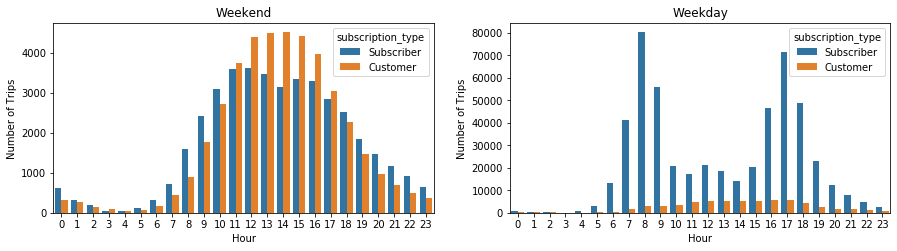

In [111]:
# Lineal scale, do not share y axis

fig, ax = plt.subplots(1,2,sharex=True, sharey=False, figsize=[15,3.5])
plotb(x='start_date', y='Number of Trips',data=trip_data_hour_grouped_WE,ax=ax[0])
plotb(x='start_date', y='Number of Trips',data=trip_data_hour_grouped_WD,ax=ax[1])
ax[0].set_xlabel('Hour')
ax[0].set_ylabel('Number of Trips')
ax[0].set_title('Weekend')
ax[1].set_xlabel('Hour')
ax[1].set_title('Weekday')
plt.show()